In [2]:
from io import BytesIO
from autogen_ext.models.openai import OpenAIChatCompletionClient
import PIL
from autogen_agentchat.messages import MultiModalMessage
from autogen_core import Image
from autogen_agentchat.agents import AssistantAgent
from autogen_core import CancellationToken

In [3]:

model_client = OpenAIChatCompletionClient(
    model="gpt-4o-mini",
)
agent = AssistantAgent(
    name="assistant",
    model_client=model_client
)


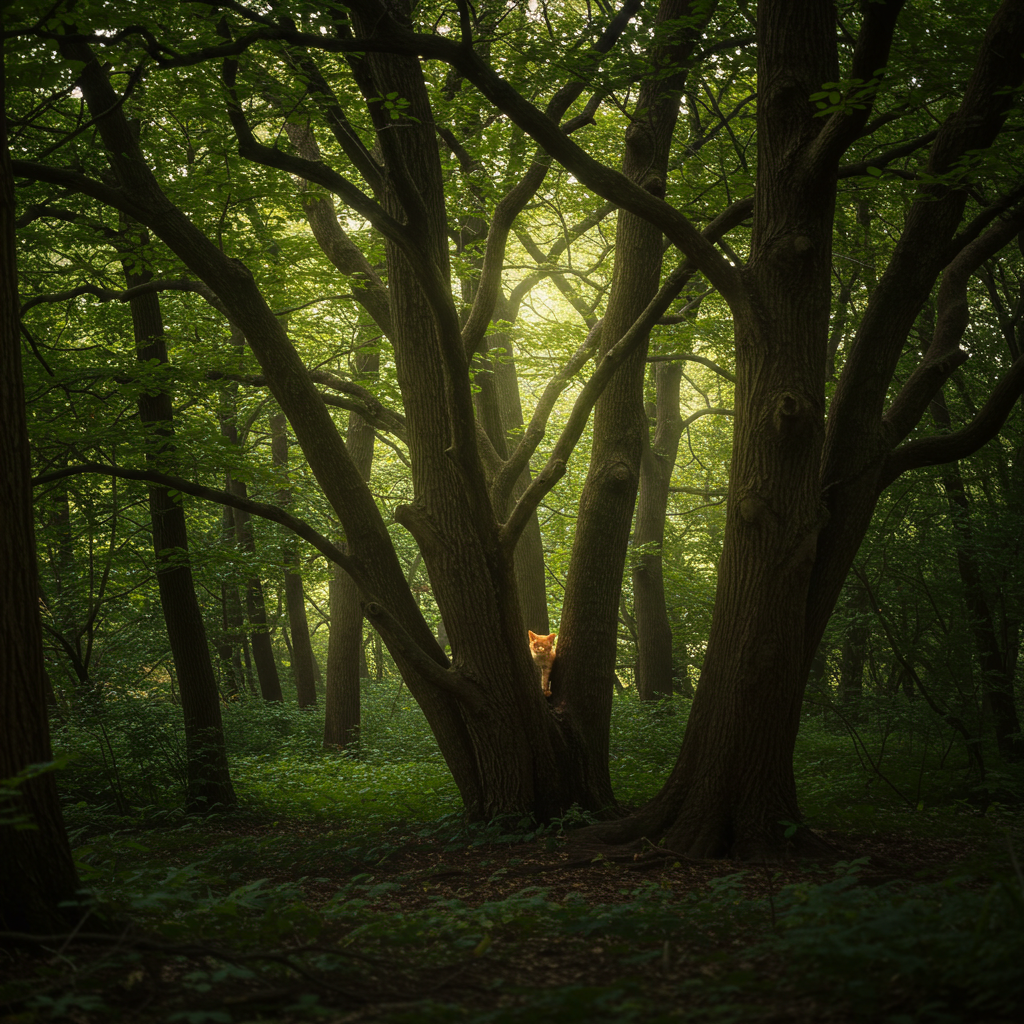

In [11]:
image_path = "../images/forest.png"  
pil_image = PIL.Image.open(image_path)
img = Image(pil_image)

multi_modal_message = MultiModalMessage(
    content=[
        "Please describe the general content of this image, focusing on the forest environment. Also, try to locate and describe the cat within the image.",
        img
    ],
    source="user"
)

img

In [12]:
response = await agent.on_messages([multi_modal_message], CancellationToken())
print(response.chat_message.content)

The image depicts a lush forest environment, characterized by tall trees and dense greenery. The scene is illuminated with a soft, diffused light that filters through the leaves, creating an ethereal atmosphere. The background features a mix of tree trunks and foliage, enhancing the feeling of depth and tranquility in the woods.

Within this forest, there's a cat located partially visible among the trees. The cat appears to have a reddish-orange coat and is perched on a branch or nestled in the nook of a tree trunk, blending somewhat with the natural surroundings. Its position suggests a moment of stillness, as it observes the forest environment, integrating into the peacefulness of the setting.

TERMINATE
